In [15]:
import os
import keras 
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder 
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler

In [4]:
encoder = OneHotEncoder()
encoder.fit([[0], [1]]) 

OneHotEncoder()

In [5]:
data = []
paths = []
result = []

for r, d, f in os.walk(r'/Users/rahulkushwah/Documents/JUPYTER/archive/brain_tumor_dataset/yes'):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((240,240))
    img = np.array(img)
    if(img.shape == (240,240,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())

In [6]:
paths = []
for r, d, f in os.walk(r"/Users/rahulkushwah/Documents/JUPYTER/archive/brain_tumor_dataset/no"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((240,240))
    img = np.array(img)
    if(img.shape == (240,240,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())

In [7]:
data = np.array(data)
data.shape

(139, 240, 240, 3)

In [8]:
result = np.array(result)
result = result.reshape(139,2)

In [9]:
x_train,x_test,y_train,y_test = train_test_split(data, result, test_size=0.2, shuffle=True, random_state=0)

In [10]:
model = Sequential()

# Zero Padding Layer with pool size of (2,2)
model.add(Conv2D(32, kernel_size=(2, 2), input_shape=(240, 240, 3), padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolution Layer with 32 filters, each of 7*7 pixels and stride equal to 1
model.add(Conv2D(32, kernel_size=(7, 7), strides=(1, 1), activation='relu', padding='valid'))

# Batch Normalization Layer with 32 filters
model.add(BatchNormalization())

# Activation Layer with ReLU activation function
model.add(Conv2D(32, kernel_size=(1, 1), activation='relu'))

# Pooling Layer 1 with pool size of (4,4)
model.add(MaxPooling2D(pool_size=(4, 4)))

# Pooling Layer 2 with pool size of (2,2)
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten Layer
model.add(Flatten())

# Densely Connected Layer with 512 neurons
model.add(Dense(512, activation='relu'))

# Output Layer with single neuron for tumor classification
model.add(Dense(2, activation='softmax'))

# Model Compilation
model.compile(loss="categorical_crossentropy", optimizer="Adamax", metrics=["accuracy"])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 240, 240, 32)      416       
                                                                 
 batch_normalization (Batch  (None, 240, 240, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 120, 120, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 114, 114, 32)      50208     
                                                                 
 batch_normalization_1 (Bat  (None, 114, 114, 32)      128       
 chNormalization)                                                
                                                        

In [20]:
y_train.shape

(111, 2)

In [21]:
history = model.fit(x_train, y_train, epochs = 30, batch_size = 40, verbose = 1,validation_data = (x_test, y_test))

Epoch 1/30
3/3 [==============================] - 4s 1s/step - loss: 21.6295 - accuracy: 0.5405 - val_loss: 106.6514 - val_accuracy: 0.5000
Epoch 2/30
3/3 [==============================] - 4s 1s/step - loss: 3.8302 - accuracy: 0.6216 - val_loss: 44.8623 - val_accuracy: 0.5000
Epoch 3/30
3/3 [==============================] - 3s 1s/step - loss: 4.6274 - accuracy: 0.4955 - val_loss: 8.1075 - val_accuracy: 0.6429
Epoch 4/30
3/3 [==============================] - 4s 1s/step - loss: 1.2300 - accuracy: 0.6486 - val_loss: 41.2734 - val_accuracy: 0.5000
Epoch 5/30
3/3 [==============================] - 4s 1s/step - loss: 2.1384 - accuracy: 0.5676 - val_loss: 35.9420 - val_accuracy: 0.5000
Epoch 6/30
3/3 [==============================] - 4s 1s/step - loss: 1.3100 - accuracy: 0.6847 - val_loss: 15.4925 - val_accuracy: 0.6071
Epoch 7/30
3/3 [==============================] - 4s 1s/step - loss: 0.8277 - accuracy: 0.6667 - val_loss: 5.6627 - val_accuracy: 0.6429
Epoch 8/30
3/3 [==================

In [22]:
#trained model, 'x_test', 'y_test' are test data
evaluation_results = model.evaluate(x_test, y_test)

# 'evaluate' method returns a list of metrics, including accuracy
accuracy = evaluation_results[1]

print("Model Accuracy on Test Set: {:.2f}%".format(accuracy * 100))


1/1 [==============================] - 0s 234ms/step - loss: 0.7036 - accuracy: 0.7143
Model Accuracy on Test Set: 71.43%


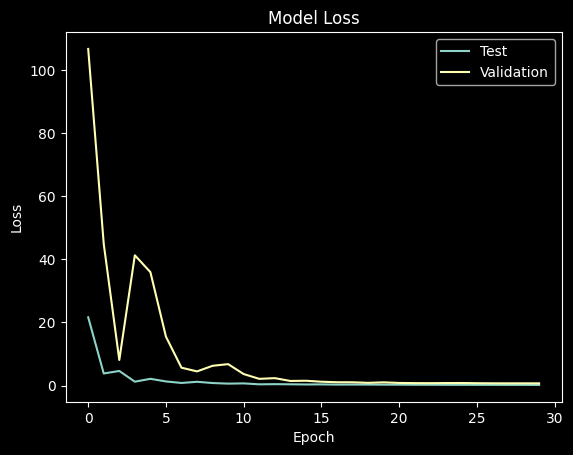

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()